# AI & ML Internship                    Task-3
### By Elevate Labs

# 1.Import and preprocess the dataset.


In [24]:
import pandas as pd

# Load your horse dataset
df = pd.read_csv('Housing.csv')

# Replace 'yes' with 1 and 'no' with 0
df.replace({'yes': 1, 'no': 0}, inplace=True)

df.replace({'furnished' :1,'unfurnished':2,'semi-furnished':3},inplace=True)

# (No saving to CSV)
print(df.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                 3  
3                 1  
4                 1  


C:\Users\sujal\AppData\Local\Temp\ipykernel_13972\2031134496.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)
C:\Users\sujal\AppData\Local\Temp\ipykernel_13972\2031134496.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'furnished' :1,'unfurnished':2,'semi-furnished':3},inplace=True)


In [26]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,3
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,3
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


# 2.Split data into train-test sets.


In [57]:
X = df.iloc[:,1:13]
y = df['price']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=50)


# 3.Fit a Linear Regression model using sklearn.linear_model.
# 4.Evaluate model using MAE, MSE, R².


In [59]:

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("mean absolute error is :", mae)

Mean Squared Error: 852563443450.0237
R2 Score: 0.749309943628877
mean absolute error is : 745316.921824061


# 5.Plot regression line and interpret coefficients.


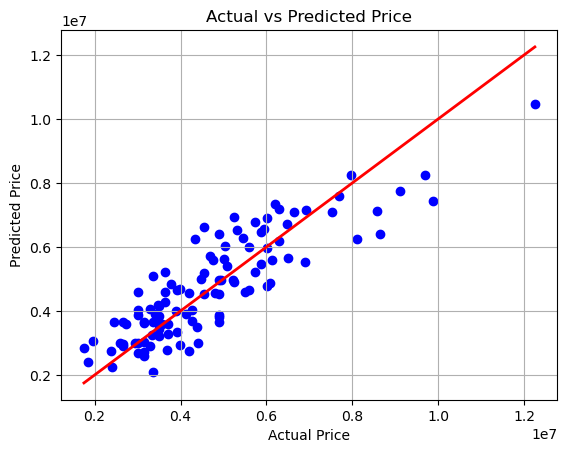

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # perfect line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()


In [64]:

print("Intercept:", lr_model.intercept_)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coefficients)


Intercept: -407110.98745003715
             Feature    Coefficient
0               area     238.037531
1           bedrooms  129501.457438
2          bathrooms  949101.720050
3            stories  476971.998073
4           mainroad  584161.590414
5          guestroom  264903.335677
6           basement  332312.325001
7    hotwaterheating  911223.087147
8    airconditioning  916475.605650
9            parking  323939.763316
10          prefarea  685541.256199
11  furnishingstatus   51808.496467
